<a href="https://colab.research.google.com/github/jazzc001/Machinelearnning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

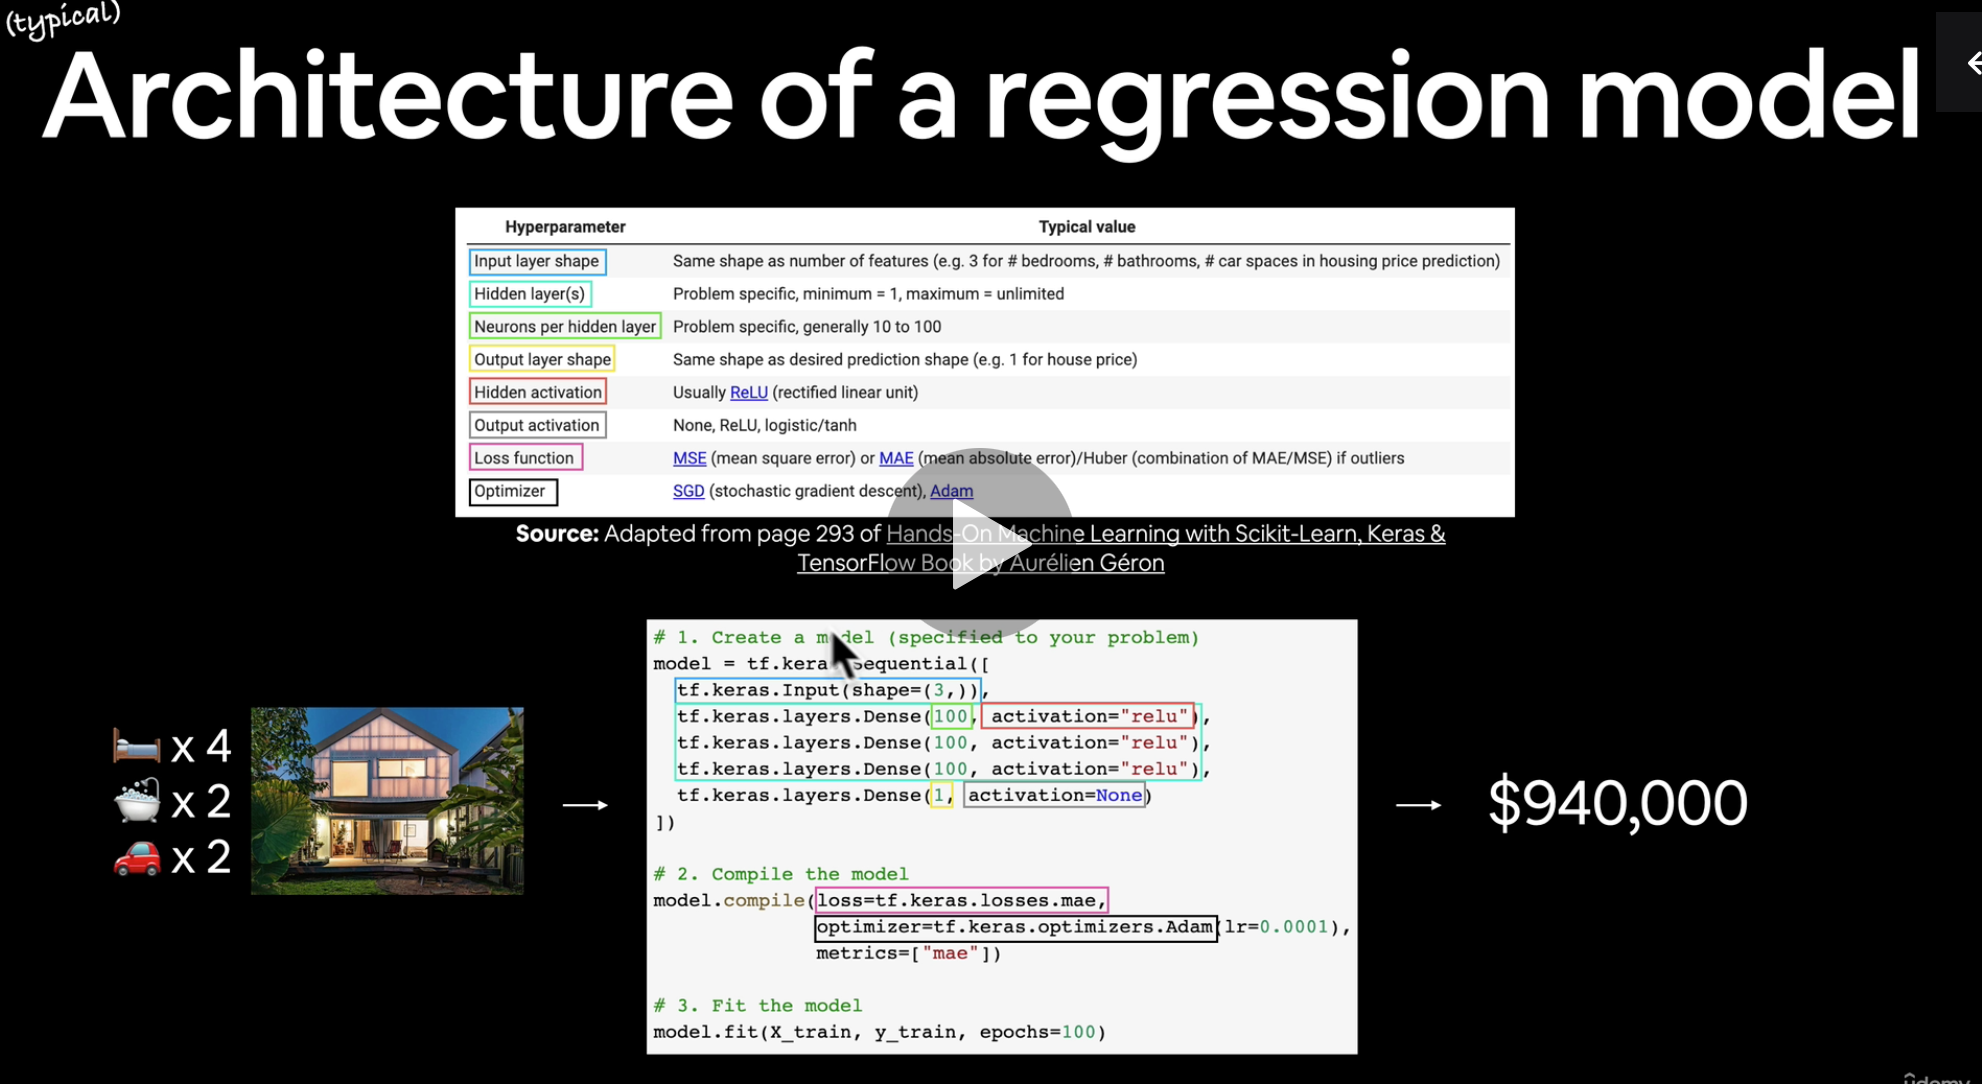

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simpligy it: prediction a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creatig some data to view and fit

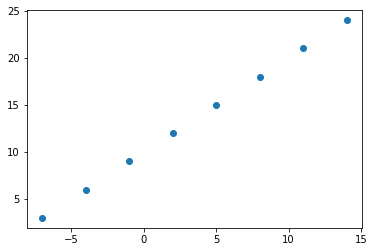

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

#Vistualize it
plt.scatter(X, y);

In [ ]:
#relationship between x and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [ ]:
# Create a demo tensor for our housig price prediction problem
house_info = tf.constant(["bedroom", "bath", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bath', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors (have to change it to dtype = tf.float32)
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

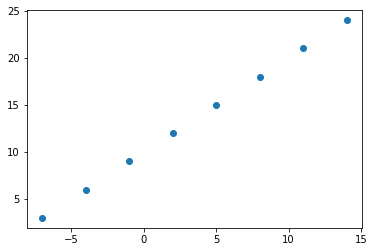

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2.  **Compliling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

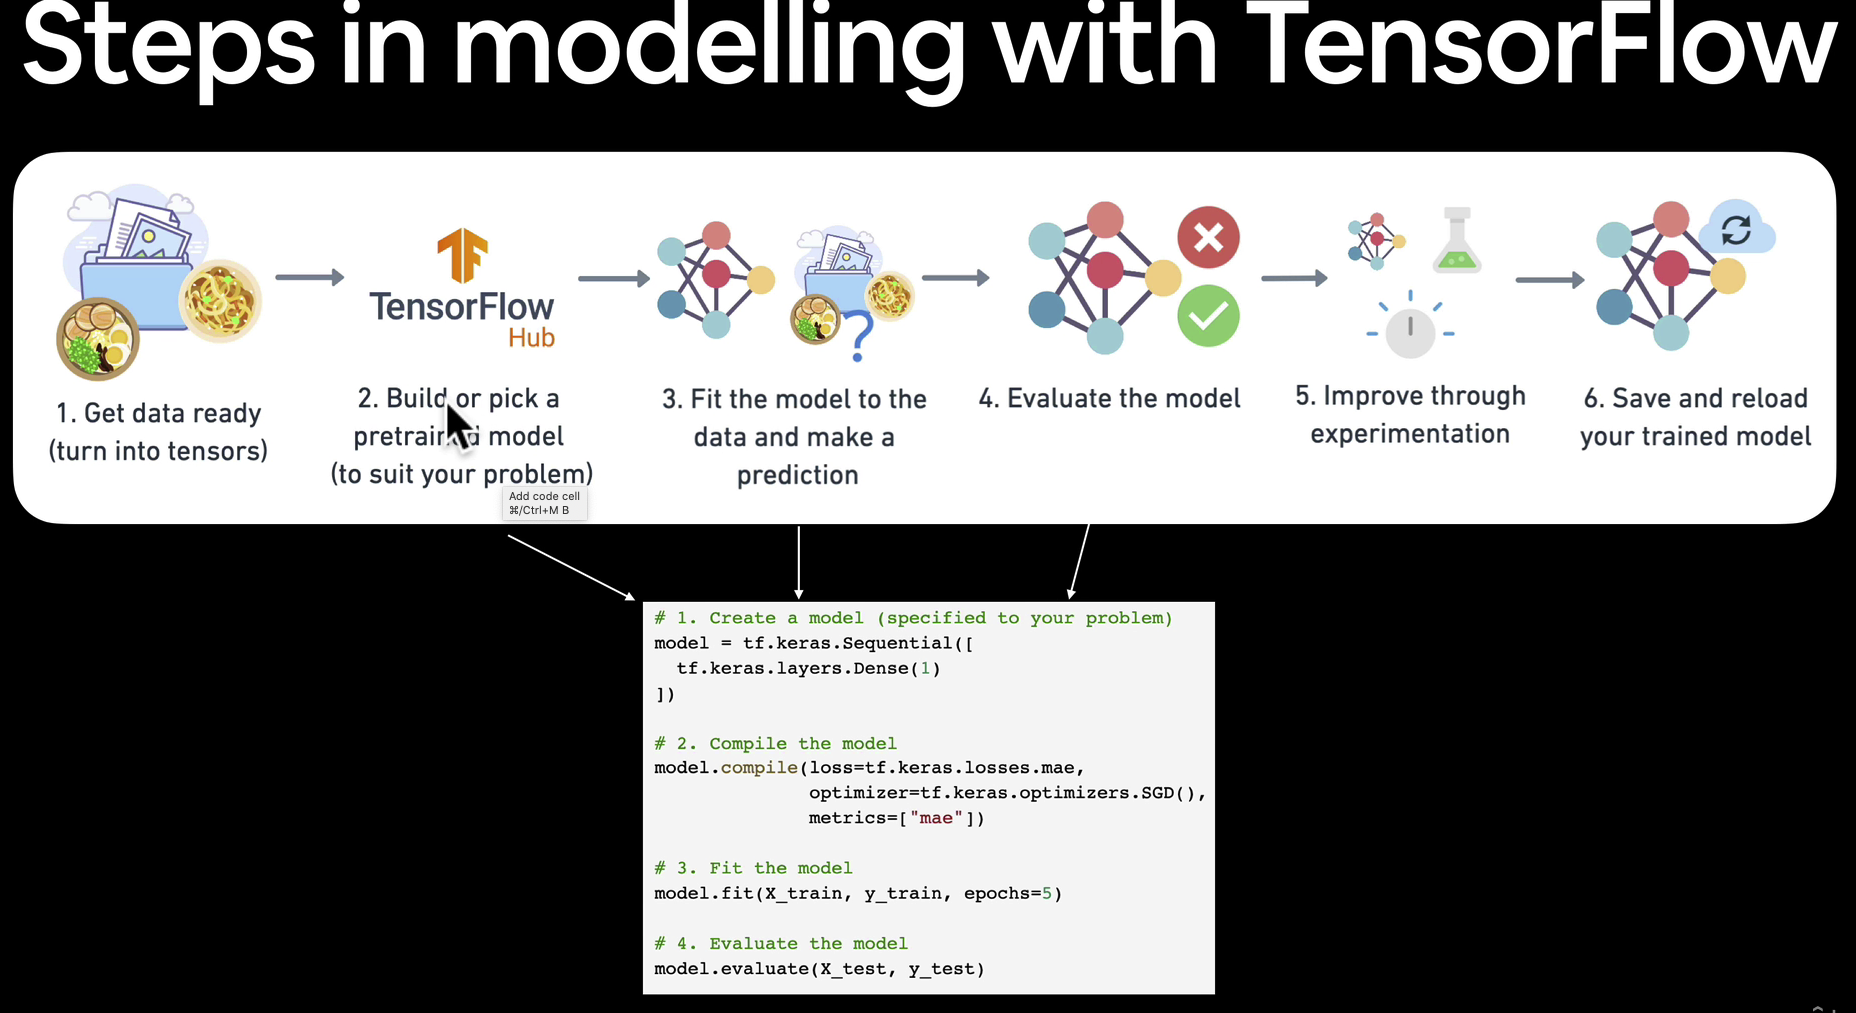

In [ ]:
#Reference from https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model.tf.keras.Sequential([
model.add(tf.keras.layer.Dense(8, input_shape=(16,)))
])


model = tf.keras.Sequential()
mode.add(tf.keras.layer.Dense(1))
model.add(tf.keras.layers.Dense(1))

AttributeError: ignored

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 528ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred +11

array([[23.71602]], dtype=float32)

##Imporove our model

We can imporve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase th enumber of hidden units (all called neurons) within each of the hidden layers, chanve the activating function of each layer.
2. **Compiling a model** - here we might change the optimization funciton or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

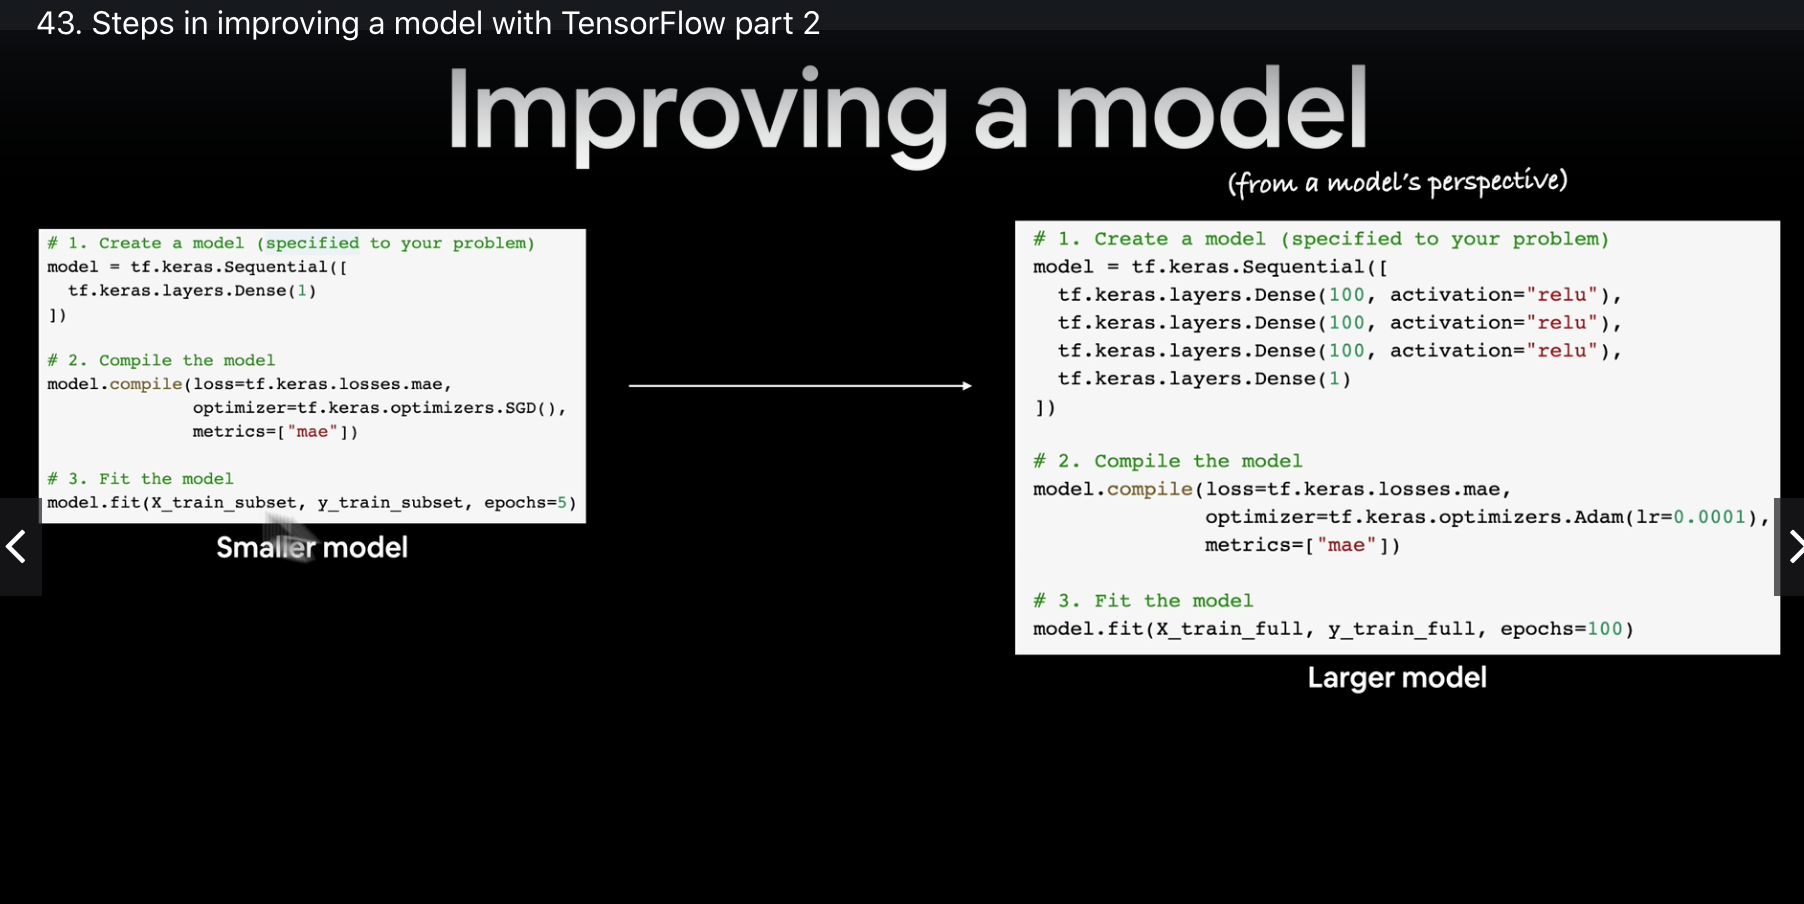

In [ ]:
#Let's rebuild our model

#1 Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                 
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3 Fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 199ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 7m

In [ ]:
# Remind ourselves of the data
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has imporved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

###Homework, try to do one more change to improve the model

In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs= 100) 

Epoch 1/100
1/1 [==============================] - 0s 280ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
#Let's remind ourself of the data
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Let's try to make a prediction
model.predict([17.0])

array([[31.223137]], dtype=float32)

##Common ways to improve a deep model:


*   Adding a layer
*   Increase the number of hiden units
*   Change the activation function
*   Change the optimizer function
*   Change the learning rate ( it is the most important parameter)
*   Fitting for longer




## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model-> fit it -> evaluate it...
```

When it comes to evaluation.. there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of ta model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

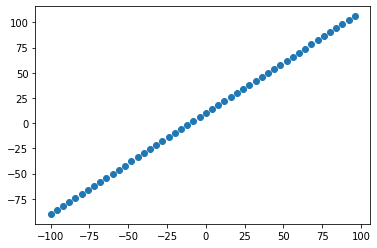

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

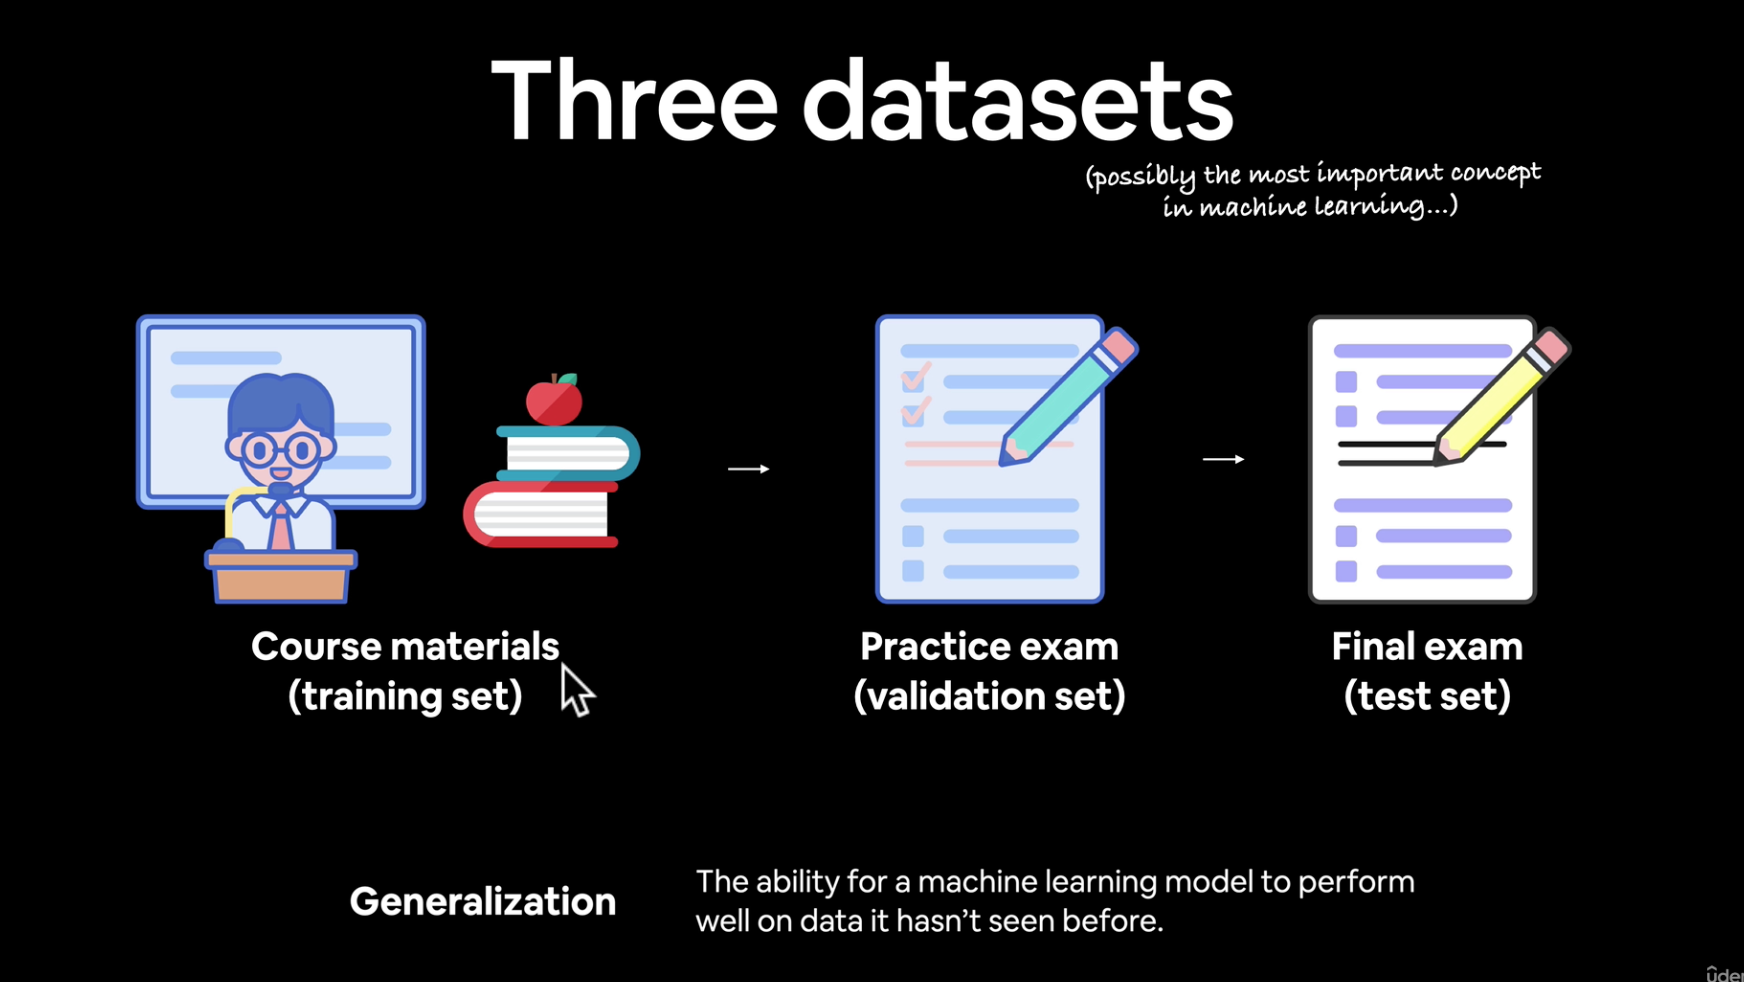

### The 3 sets...

* **Training set** - the model learn from this data, which is typically 70-80% of the total data you have available.
* **Validateion set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluatied on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train.shape

TensorShape([40])

### Visualising the data

Now we've got our data in training and test sets... let's visualize it again!


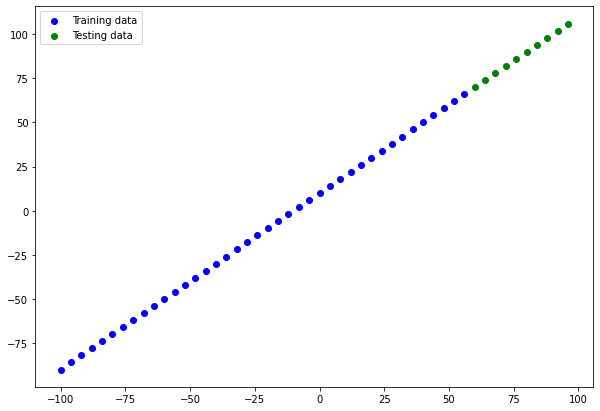

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#Show a legend
plt.legend();

In [ ]:
#Let's have a look at how to build a neural network for our data 

In [ ]:
#Build - training
model = tf.keras.Sequential([
        tf.keras.layer.Dense(1)
])

#Compile - training
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#Fit - training
model.fit(X_train, y_train, epochs=100)

AttributeError: ignored

##Visualizing the model


In [ ]:
model.summery()

AttributeError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape arguement in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the models.
* Trainable params - these are the parameters (patterns) the model can be update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT introduction to deep learning](http://introtodeeplearning.com/)

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how the effects the number of parameters (total) and trainable) by calling `model.summary()`.



In [ ]:
#Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


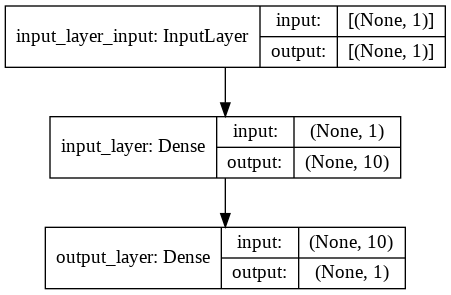

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model= model, show_shapes=True )

### Visualizing our model's prediction

To visualizing predictions, it is a good idea to plot them against the ground truth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Notes:** If you feel like you're going to reuse some kind of functionality in the future, it is a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots trainign data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot Testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();
  

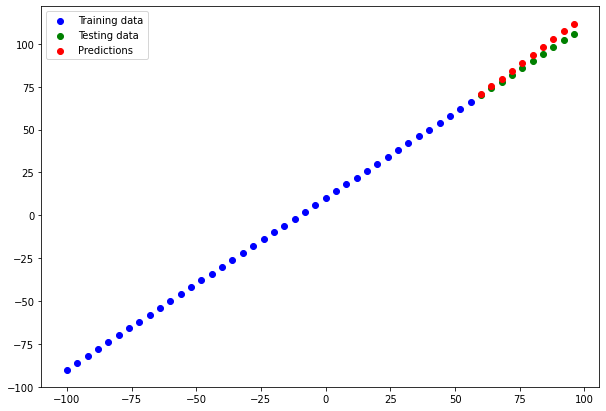

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data = X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluation our model's predictions with our regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate our model's performance.

Since we're working on a regression, two of the main metrics:
* MEA - Mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

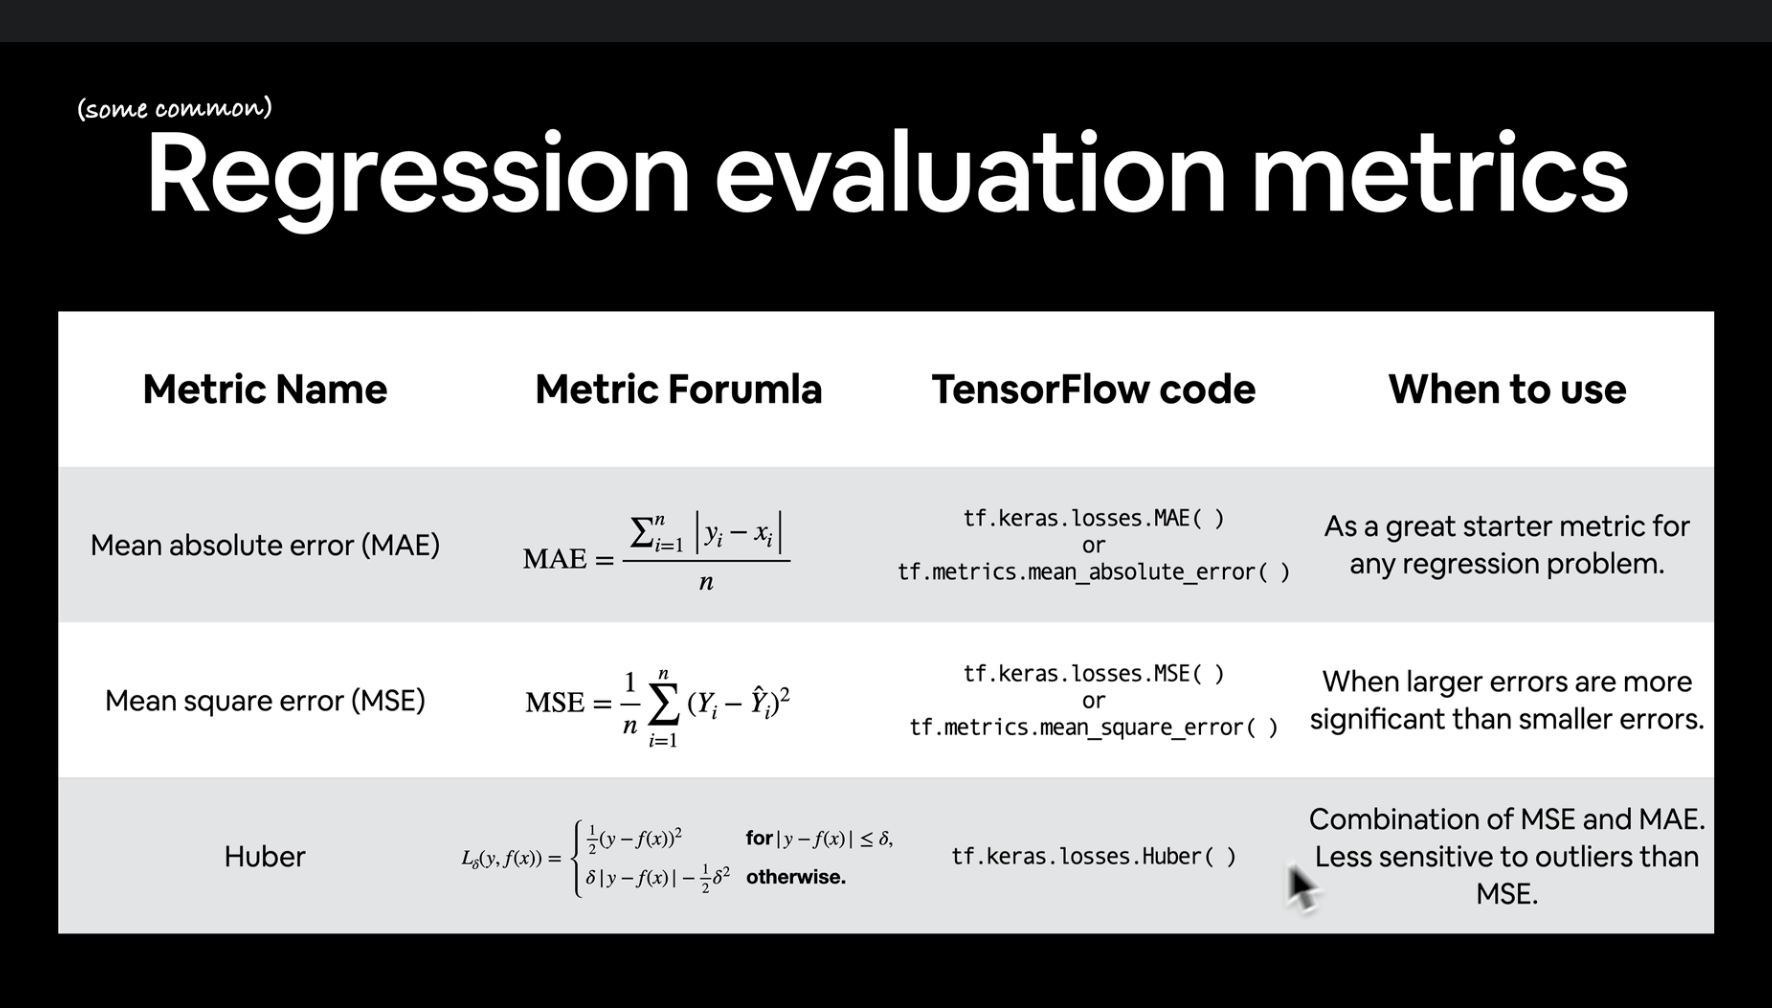

In [ ]:
# Evaluate the model one the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))

In [ ]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
#Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
#mse will typically larger than mae

In [ ]:
# Make some functions to resure MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it 
``` 

1. **Get more data** - get more example for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. **Make your model larger (using a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4`
5.

**Build** `model_1`


In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])
#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - l

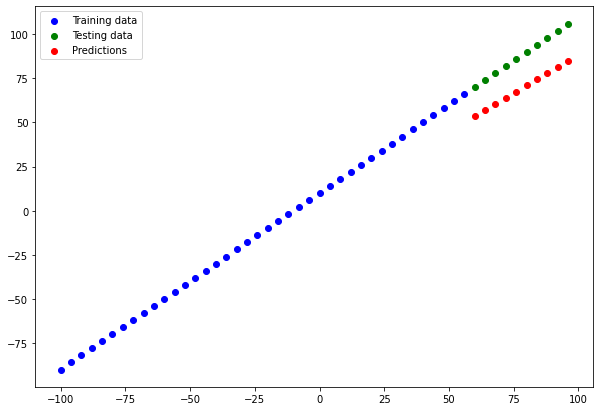

In [ ]:
# Make and plot prediction for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2**

* 2 dense layers, traind for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

In [ ]:
#Create
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

#Compile
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

#Fit
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

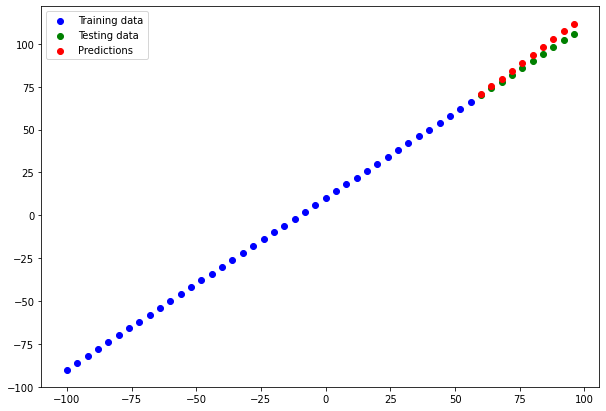

In [ ]:
# make and plot prediction model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [ ]:
y_pred_2.size

10

In [ ]:
#Calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
#Create
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10), 
          tf.keras.layers.Dense(1)
])

#Compile
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
#Fit
model_3.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 7ms/

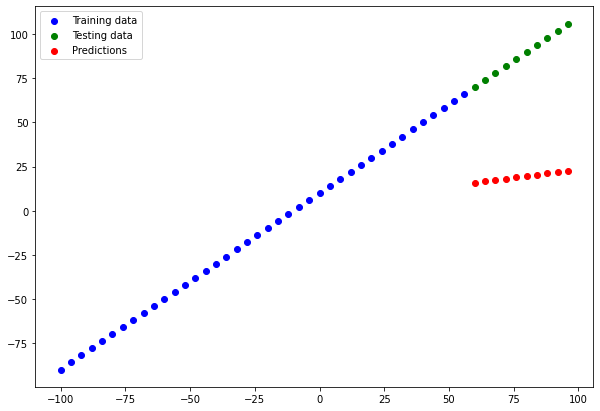

In [ ]:
# make and plot prediction model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# Calucting the model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Notes:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the result of our experiments

We have run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]



all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

model        mae          mse
0  model_1  18.745327   353.573364
1  model_2   3.196941    13.070143
2  model_3  68.713615  4808.027344

Looks like `model_2` perform the bset

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Notes:** One of your main goals should be to minimize the time between your experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.  Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habt in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, ther are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* [**TensorBoard**](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [**Weights & Biases**](https://wandb.ai/site) - a tool for tracking all of kinds of machines learning experiments(plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab ( or where they were trained) such as in a web application or a mobile app.

1. The SavedModel format
2. The HDF5 format

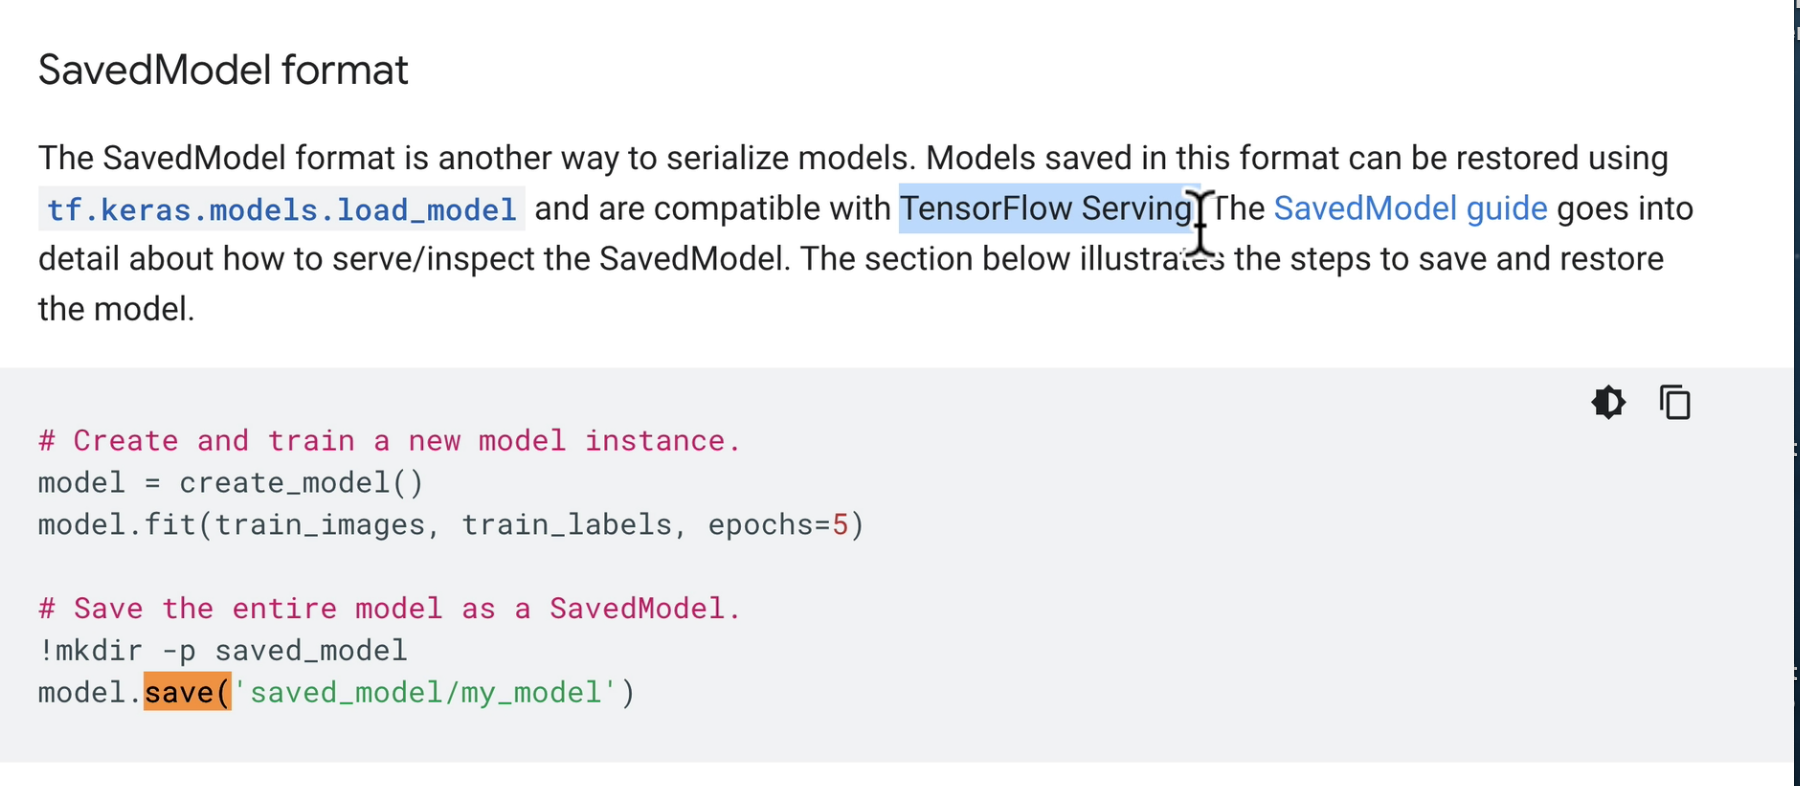

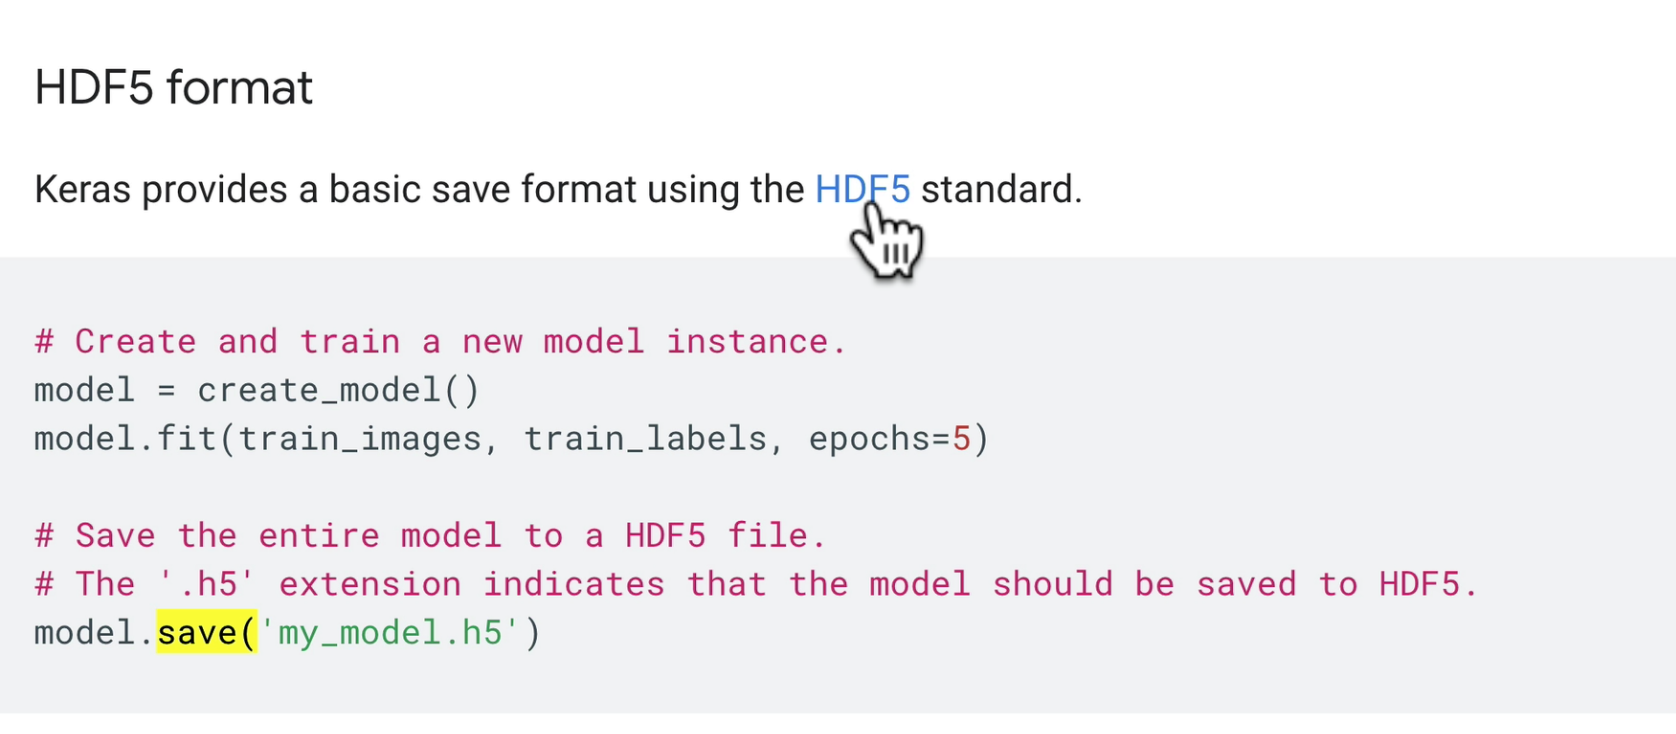

In [ ]:
#Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
#Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
#Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SaveModel format model predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_pred, loaded_SavedModel_format_pred

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32), array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32))

In [ ]:
mae(y_test, model_2_pred)== mae(y_test, loaded_SavedModel_format_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_2_pred.squeeze() == loaded_SavedModel_format_pred.squeeze()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
loaded_SavedModel_format_pred.squeeze()

array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check to see if loaded .h5 model predcition match model_2
model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred = loaded_SavedModel_format_pred
model_2_pred == loaded_h5_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on teh file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive and copying it there (see 2nd code cell below)

In [ ]:
# Download a fiel from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file form Google Colab to Google Drive (require mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 【12】剑桥雅思真题12.pdf
 2014貴州義教B組
'2016 notes'
'Annual business budget.gsheet'
'Bank Statement  (1).png'
'Bank Statement .png'
 BD.gsheet
'BD Message.gdoc'
 best_model_HDF5_format.h5
 bugreport.png
 bugreport.txt
'Colab Notebooks'
'Copy of Leads.xlsx'
'Copy of Operations Management Assignment.gdoc'
 CVs
'Follow up email.gdoc'
 Futures
 HGC
'How an Economy Grows and Why It Crashes by Peter D. &amp;amp; Andrew J. Schiff.pdf'
 Ideas.gdoc
 image1.jpeg
 image1.JPG
 image2.jpeg
 image3.jpeg
 image4.jpeg
 image5.jpeg
 image.jpg
'Jasmine 2018 (1).gdoc'
'Jasmine 2018.docx'
'Jasmine 2018.gdoc'
 JD
'Luxury Retail Client Contact Details 2017.xls (2).xlsx'
'M1 Notes'
'Master of Physio'
'Master of Quantitative Trading'
'Monthly budget (1).gsheet'
'Monthly budget (2).gsheet'
'Monthly budget.gsheet'
 MTG-CryptoBot-Freq-VM.ova
 Nityo
 pexels-anamul-rezwan-1145434.jpg
 pexels-anamul-rezwan-1216544.jpg
 pexels-cleyder-duque-3637834.jpg
 pexels-cleyder-duque-3637837.jpg
 pexels-johnny-mckane-237950.jpg
 pexel

## A larger example


In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

O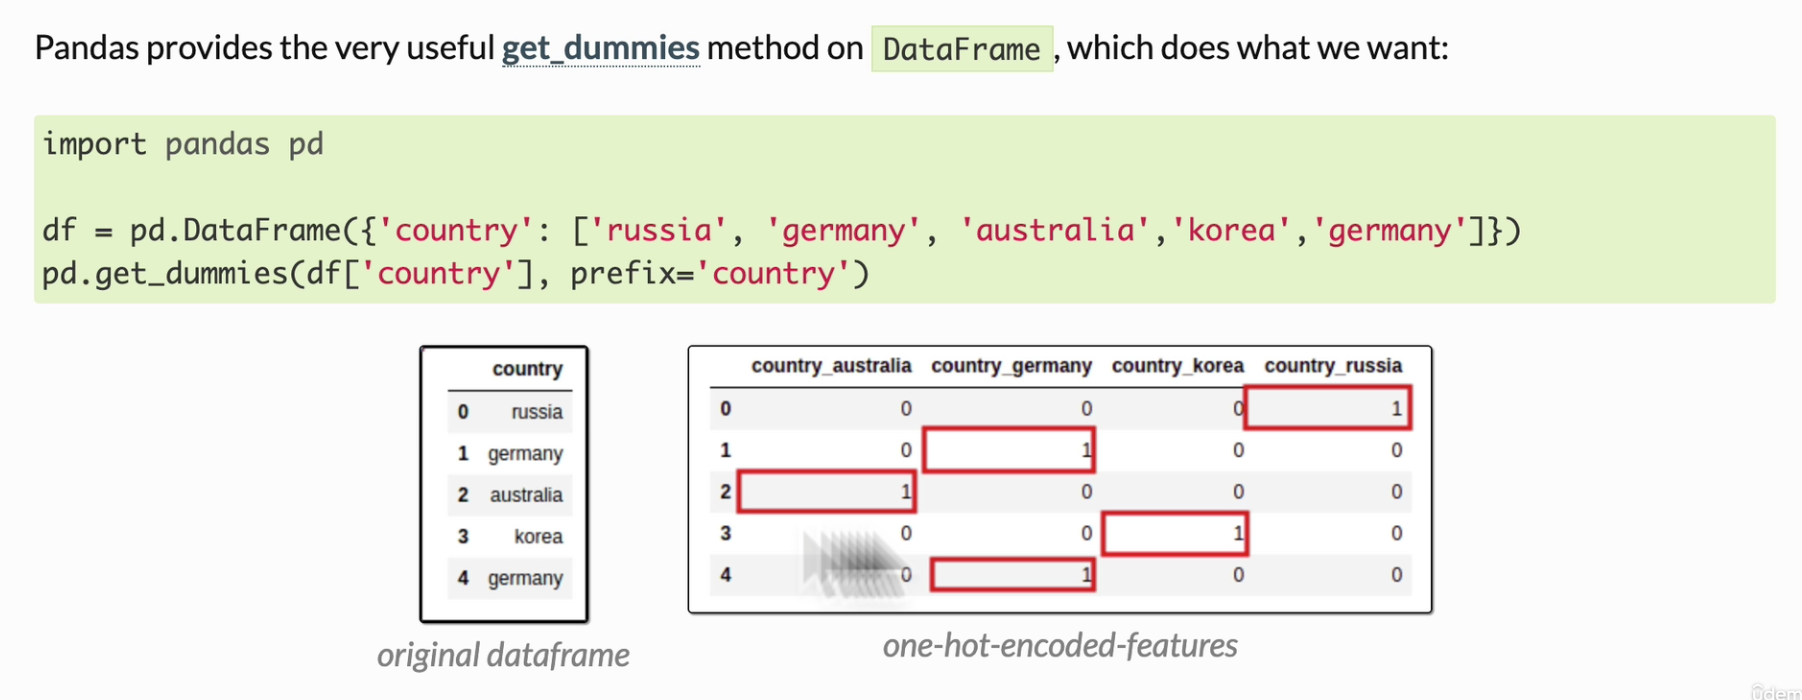ne hot encoding dummies


In [ ]:
#Let's try one-hot encode our DataFrame so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

age     bmi  ...  region_southeast  region_southwest
0      19  27.900  ...                 0                 1
1      18  33.770  ...                 1                 0
2      28  33.000  ...                 1                 0
3      33  22.705  ...                 0                 0
4      32  28.880  ...                 0                 0
...   ...     ...  ...               ...               ...
1333   50  30.970  ...                 0                 0
1334   18  31.920  ...                 0                 0
1335   18  36.850  ...                 1                 0
1336   21  25.800  ...                 0                 1
1337   61  29.070  ...                 0                 0

[1338 rows x 12 columns]

In [ ]:
#Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
#view X
X.head()


age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 11 columns]

In [ ]:
#view y
y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

**Reference:**[Scikitlearn train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
#Build a neural network (sort of like model_2)
tf.random.set_seed(42)
#Build
insurance_model = tf.keras.Sequential([
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])
#Compile
insurance_model.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.SGD(),
                    metrics = ['mae'])

#Fit
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 808us/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 841us/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 872us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 838us/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 940us/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 827us/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 847us/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 816us/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 846us/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 958us/step - loss: 7493.1

In [ ]:
#Evaluate the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:

y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model is not performing too well... Let's try and improve it.

To (try) import our model, we will run 2 experiements:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Train for longer


**Build `insurance_model_1`**

1. Add an extra layer with more midden units and use Adam optimizer

In [ ]:
tf.random.set_seed(42)

#Build
insurance_model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Compile
insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

#Fit
insurance_model_1.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [ ]:
#Evaluate
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

**Build `insurance_model_2`**
2. Train for longer

In [ ]:
#set random seed
tf.random.set_seed(42)

#Build
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#Compile
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

#Fit
history = insurance_model_2.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13321.5840 - mae: 13321.5840
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13223.3330 - mae: 13223.3330
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12998.6709 - mae: 12998.6709
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12518.9355 - mae: 12518.9355
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11636.5439 - mae: 11636.5439
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 10323.1084 - mae: 10323.1084
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8868.9893 - mae: 8868.9893
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7824.9985 - mae: 7824.9985
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7514.4321 - mae: 7514.4321
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7477.0400 - ma

In [ ]:
#Evaluate our model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3585.3867 - mae: 3585.3867


[3585.38671875, 3585.38671875]

In [ ]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

###Visualise learning curve

Text(0.5, 0, 'epochs')

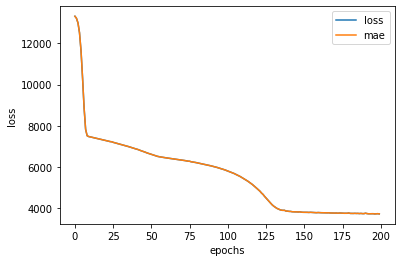

In [ ]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Questions:** How long should you train for?

It depends.  Really... It depends on the problem you are working on.  However, many people have asked this question before... so TensorFlow has a solution!  It is call [EarlyStopping Callbakc](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.


#Preprocessing data (normalization and standardization)

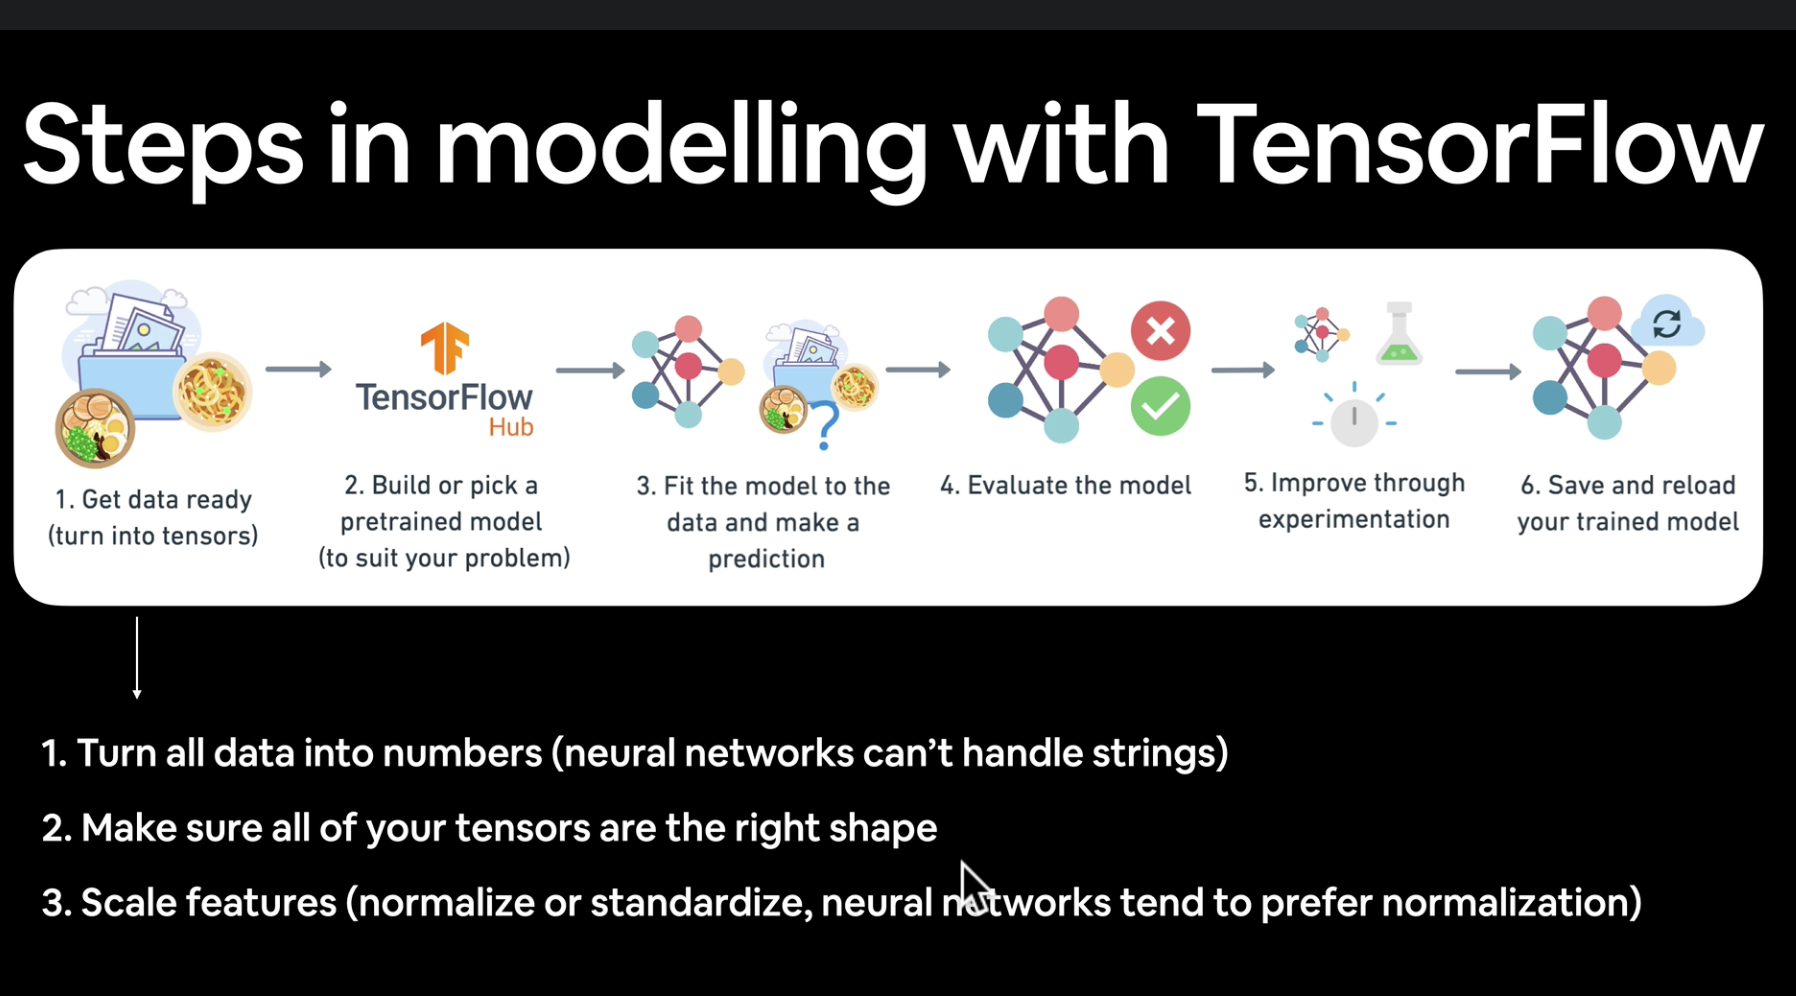

In terms of scaling (normalize) values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better

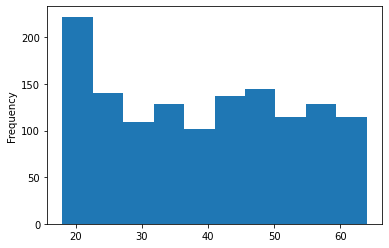

In [ ]:
X["age"].plot(kind="hist")

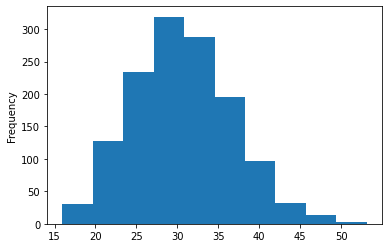

In [ ]:
X["bmi"].plot(kind='hist')

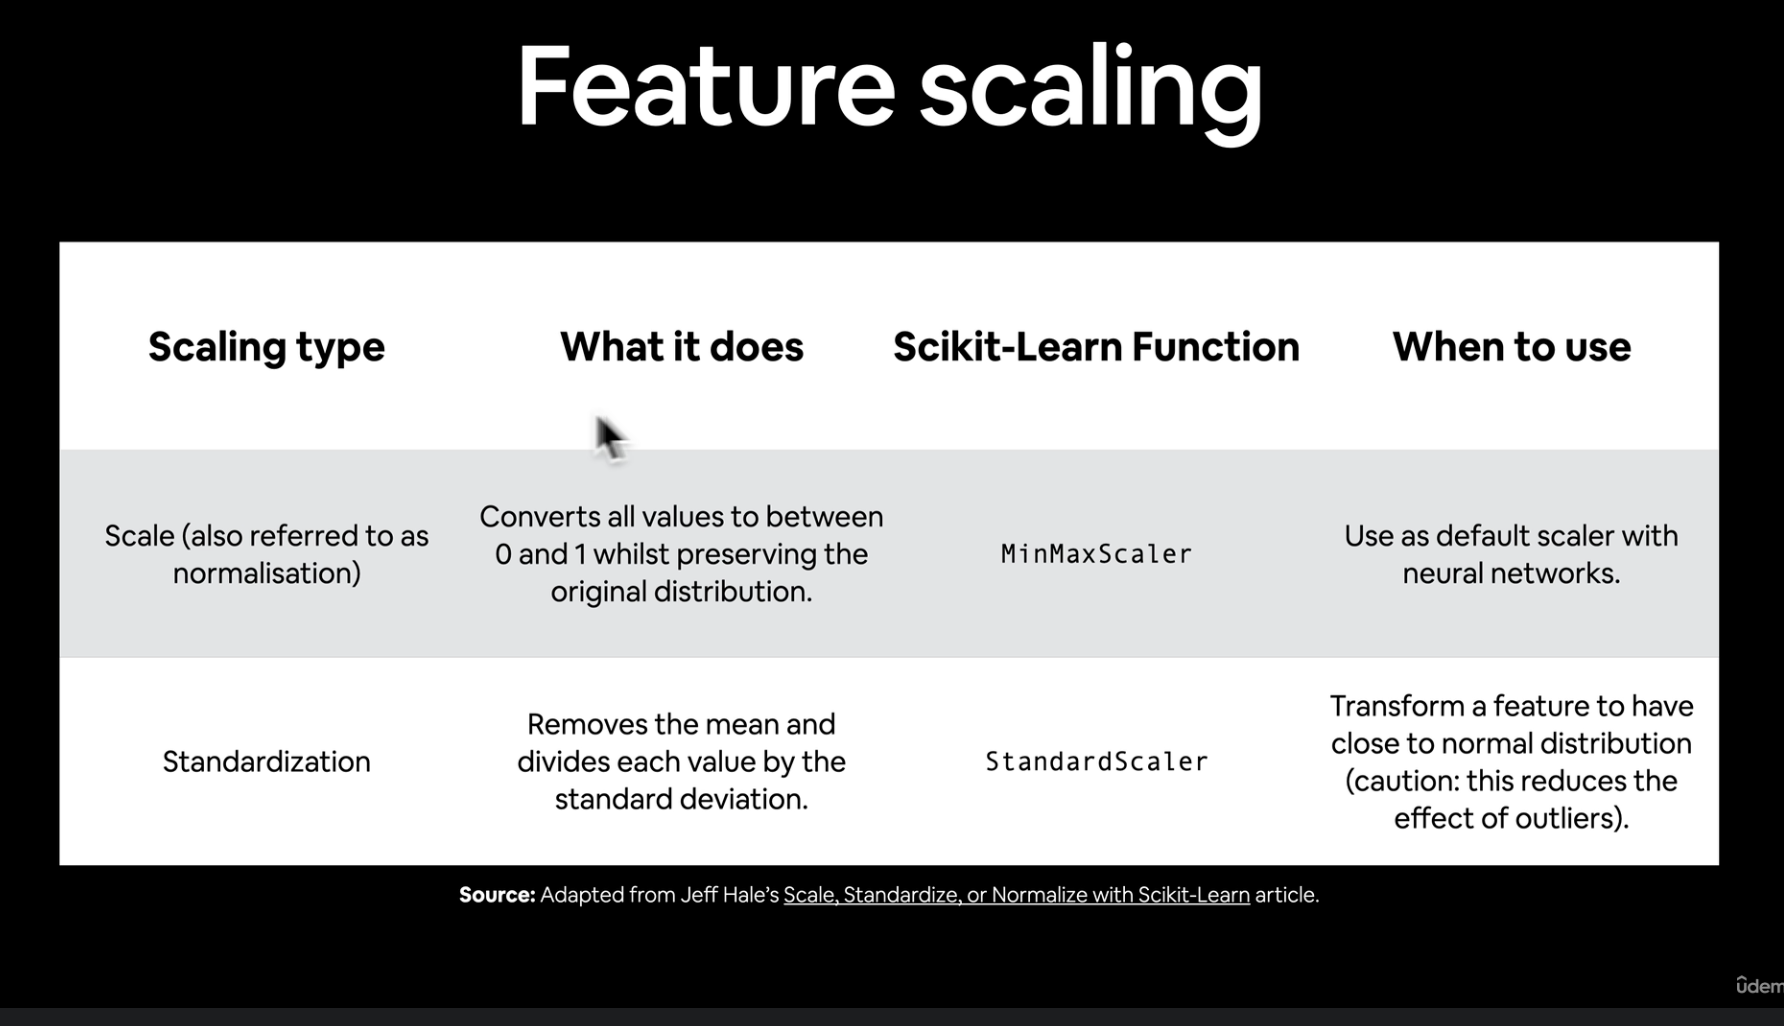

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

To prepare our data, we can borrow a few calsses from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1)
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])

)
# Create X & y value
X = insurance1.drop("charges", axis=1)
y = insurance1["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?

X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.  Now let's build a neural network model on it.

In [ ]:
#Build a neural network model to fit on our normalized data

#set random seed
tf.random.set_seed(42)

#Build
insurance_model_4 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])
#Compile
insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
#Fit
insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=1)


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [ ]:
#evaluate
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

In [ ]:
#insurance model_2
#9/9 [==============================] - 0s 1ms/step - loss: 3585.3867 - mae: 3585.3867
[3585.38671875, 3585.38671875]

## 🛠 **01. Neural network regression with TensorFlow Exercises**
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.


## **📖 01. Neural network regression with TensorFlow Extra-curriculum**
* MIT introduction deep learning lecture 1 - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of Chapter 1 of Neural Networks and Deep Learning by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* To practice your regression modelling with TensorFlow, I'd also encourage you to look through Lion Bridge's collection of datasets or Kaggle's datasets, find a regression dataset which sparks your interest and try to model.